<a href="https://colab.research.google.com/github/ARC-iTransportation/demo/blob/main/openLab2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fukushima Traffic Congestion Analytics
# 福島の交通渋滞分析

In this experiment, we identify the road segments encountering traffic congestion plentyful using heat maps.

この実験では、交通渋滞が発生する道路を特定し、ヒートマップで可視化を行います。

### Step 0: Download the Fukushima Traffic Congestion Data

### 福島交通データのダウンロード

In [ ]:
!wget -nc https://www.dropbox.com/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn&dl=0
!mv congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn congestionLengthForHour.csv

--2023-08-11 04:47:53--  https://www.dropbox.com/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn [following]
--2023-08-11 04:47:53--  https://www.dropbox.com/e/scl/fi/5n15mqvqkfpzhm0qqivk0/congestionLengthForHour.csv?rlkey=urv5zjhl2b7wwmcdvl2ygvlpn
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc84ee357640c01c696da2d5d8ff.dl.dropboxusercontent.com/cd/0/get/CBn-pCrs_YTVe-d2Tli8mp8PGVUV1fIm9QkvT7ONQV3MKsLmqikA_G0zR3kbsKxNHtQkNIciKiJMtuU3NWLfVfD_KziQWB1Rllicop1oKLuoL8xAsVytEmNIHiVXVMSff42MMyoUx4gIZqWRrDXvvmZL/file# [following]
--2023-08-11

### Step 1: Reading the traffic data
### ステップ１：　福島県の道路交通情報の読み込み

In [ ]:
import pandas as pd

input_file = 'congestionLengthForHour.csv'
dataset = pd.read_csv(input_file, index_col=0)
dataset

,"LINESTRING (37.1419776291926 140.21860458527718, 37.14058911797101 140.22638175385237)","LINESTRING (37.383898458756505 140.36024801518934, 37.37778837003653 140.3716361986066)","LINESTRING (37.03395345061722 140.8910515746116, 37.02645445237269 140.89632924043983)","LINESTRING (37.05728416761125 140.89216152887963, 37.05395144287313 140.90021654470286)","LINESTRING (37.797187186952506 140.45688721610486, 37.79718812151231 140.48938439662564)","LINESTRING (37.41361802551454 140.3863555074141, 37.40500782787108 140.38385611807186)","LINESTRING (37.38639820454284 140.36135891586255, 37.383898458756505 140.36024801518934)","LINESTRING (37.74385991475775 140.45466767158848, 37.73969364668409 140.45189032858835)","LINESTRING (37.59471044375256 140.4577298819844, 37.59943224417432 140.46189596945186)","LINESTRING (37.49831756863525 139.92861354311296, 37.50303930381861 139.93055760322358)",...,"LINESTRING (37.78607616334088 140.4155024367164, 37.7910757164911 140.41994626246105)","LINESTRING (36.95285158595973 140.89272177965933, 36.9578510033484 140.892166045194)","LINESTRING (37.45166829490816 140.35357882123407, 37.44305809792446 140.35107943245572)","LINESTRING (37.45166829490816 140.35357882123407, 37.43250347338947 140.3413585353871)","LINESTRING (37.45166829490816 140.35357882123407, 37.43444777440486 140.3441359836782)","LINESTRING (37.43750306732121 140.34719113477584, 37.42750389527853 140.3360814433997)","LINESTRING (37.45166829490816 140.35357882123407, 37.42750389527853 140.3360814433997)","LINESTRING (37.82385141285831 140.47855075790426, 37.85579317001619 140.51271296592634)","LINESTRING (37.69219892271721 140.44578195496985, 37.711918905788046 140.44661430003194)","LINESTRING (37.85607091586698 140.51271295292284, 37.83829471716113 140.49660407160349)"
2019-04-01 00:00:00,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 01:00:00,0.0,0.0,0.0,0.0,1013.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 02:00:00,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 03:00:00,0.0,0.0,0.0,0.0,1046.0,0.0,0.0,0.0,482.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01 04:00:00,0.0,0.0,0.0,0.0,975.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2: Remove abnormal sensor recordings within in the traffic data
### ステップ２：道路交通情報から無意味なデータ（異常なセンサー記録）を取り除く

#### Step 2.1: Removing the timestamp column


In [ ]:
processed_df = dataset.reset_index()
processed_df = processed_df.drop('index', axis=1)
processed_df

,"LINESTRING (37.1419776291926 140.21860458527718, 37.14058911797101 140.22638175385237)","LINESTRING (37.383898458756505 140.36024801518934, 37.37778837003653 140.3716361986066)","LINESTRING (37.03395345061722 140.8910515746116, 37.02645445237269 140.89632924043983)","LINESTRING (37.05728416761125 140.89216152887963, 37.05395144287313 140.90021654470286)","LINESTRING (37.797187186952506 140.45688721610486, 37.79718812151231 140.48938439662564)","LINESTRING (37.41361802551454 140.3863555074141, 37.40500782787108 140.38385611807186)","LINESTRING (37.38639820454284 140.36135891586255, 37.383898458756505 140.36024801518934)","LINESTRING (37.74385991475775 140.45466767158848, 37.73969364668409 140.45189032858835)","LINESTRING (37.59471044375256 140.4577298819844, 37.59943224417432 140.46189596945186)","LINESTRING (37.49831756863525 139.92861354311296, 37.50303930381861 139.93055760322358)",...,"LINESTRING (37.78607616334088 140.4155024367164, 37.7910757164911 140.41994626246105)","LINESTRING (36.95285158595973 140.89272177965933, 36.9578510033484 140.892166045194)","LINESTRING (37.45166829490816 140.35357882123407, 37.44305809792446 140.35107943245572)","LINESTRING (37.45166829490816 140.35357882123407, 37.43250347338947 140.3413585353871)","LINESTRING (37.45166829490816 140.35357882123407, 37.43444777440486 140.3441359836782)","LINESTRING (37.43750306732121 140.34719113477584, 37.42750389527853 140.3360814433997)","LINESTRING (37.45166829490816 140.35357882123407, 37.42750389527853 140.3360814433997)","LINESTRING (37.82385141285831 140.47855075790426, 37.85579317001619 140.51271296592634)","LINESTRING (37.69219892271721 140.44578195496985, 37.711918905788046 140.44661430003194)","LINESTRING (37.85607091586698 140.51271295292284, 37.83829471716113 140.49660407160349)"
0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1013.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1046.0,0.0,0.0,0.0,482.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,975.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step 2.1: Removing abonormal high values (congestion lengths greater than 2 kilometers)
異常値の削除


Sometimes sensors record abnormal high and low values due to erosion. It is important to remove them from the data.

時折、センサーは異常な高値や低値を記録することがあります。これらをデータから取り除く。

In [ ]:
maxValueInEachColumn = dataset.max() #Gathering the maximum PM2.5 value recorded by each sensor
maxValueInEachColumn

LINESTRING (37.1419776291926 140.21860458527718, 37.14058911797101 140.22638175385237)       720.0
LINESTRING (37.383898458756505 140.36024801518934, 37.37778837003653 140.3716361986066)      991.0
LINESTRING (37.03395345061722 140.8910515746116, 37.02645445237269 140.89632924043983)      1030.0
LINESTRING (37.05728416761125 140.89216152887963, 37.05395144287313 140.90021654470286)      883.0
LINESTRING (37.797187186952506 140.45688721610486, 37.79718812151231 140.48938439662564)    1330.0
                                                                                             ...  
LINESTRING (37.43750306732121 140.34719113477584, 37.42750389527853 140.3360814433997)       980.0
LINESTRING (37.45166829490816 140.35357882123407, 37.42750389527853 140.3360814433997)      1980.0
LINESTRING (37.82385141285831 140.47855075790426, 37.85579317001619 140.51271296592634)      990.0
LINESTRING (37.69219892271721 140.44578195496985, 37.711918905788046 140.44661430003194)    1770.0
LINESTRING

異常に大きすぎる値の削除（2km以上のもの）

<AxesSubplot:>

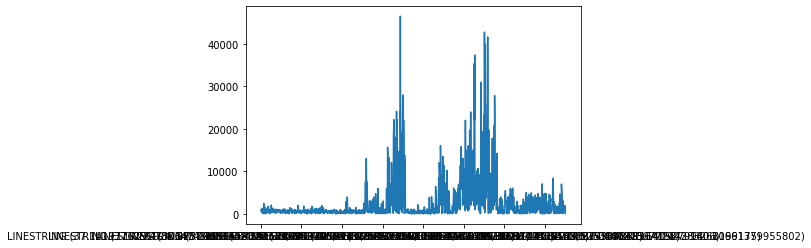

In [ ]:
maxValueInEachColumn.plot()

2km以下のデータのみを抽出し、それぞれの道路の最大交通渋滞長をプロット

<AxesSubplot:>

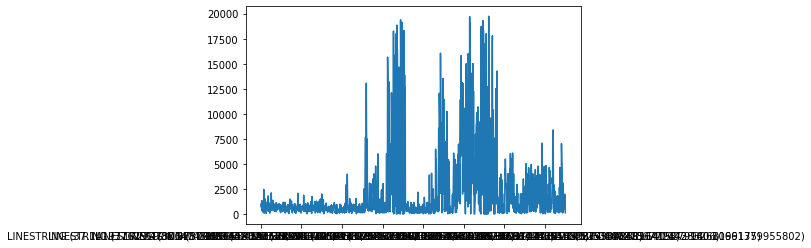

In [ ]:
dataset.where(dataset <= 20000, 0, inplace=True)
dataset.max().plot()

#### Step 2.3: Removing abnormal low values recorded by the sensors
低すぎる値の削除

<AxesSubplot:>

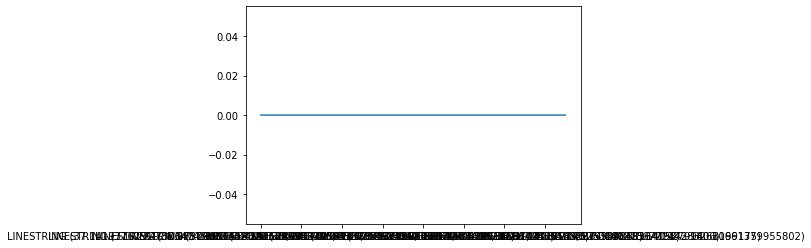

In [ ]:
minValueInEachColumn = dataset.min() #Reading the minimum PM2.5 value recorded by each sensor
minValueInEachColumn.plot()

Since no sensor has recorded values less than 0. It is fine.

0より小さい値は存在しないため、出力を行わない。

### Step 3: Visualizing the Fukushima Traffic Congestion Data

#### Step 3.1: Viewing the maximum traffic congestion length observed on each road using a heatmap (Redder/hotter the data, longer the traffic. Colder, shorter)
### ステップ 3: 各道路の最大渋滞長を可視化 (赤いほど渋滞が長い、青いほど渋滞が短い)。

In [ ]:
import shapely.geometry
import shapely.wkt
# max_congestion = pd.DataFrame(columns=["long", "lat", "maxLength"])
lat_list = list()
lon_list = list()
maxLength_list = list()
for line, length in dataset.max().items():
    line = shapely.wkt.loads(line)
    x, y = line.xy
    lat_list.append(x[0])
    lon_list.append(y[0])
    maxLength_list.append(length)
max_congestion = pd.DataFrame({'long': lon_list, 'lat': lat_list, 'maxLength': maxLength_list})
#max_congestion

import plotly.express as px
from statistics import median

fig = px.density_mapbox(max_congestion, lat = 'lat', lon = 'long', z = 'maxLength',
                        radius = 6,
                        zoom = 6,
                        height=500,
                        width=1000,
                        center=dict(lat=median(lat_list), lon=median(lon_list)),
                        mapbox_style = 'open-street-map',)
fig.show()

,long,lat,maxLength
0,140.218605,37.141978,720.0
1,140.360248,37.383898,991.0
2,140.891052,37.033953,1030.0
3,140.892162,37.057284,883.0
4,140.456887,37.797187,1330.0
...,...,...,...
1498,140.347191,37.437503,980.0
1499,140.353579,37.451668,1980.0
1500,140.478551,37.823851,990.0
1501,140.445782,37.692199,1770.0


#### Step 3.2: Viewing the roads that have frequently observed traffic congestion

#### ステップ 4: 渋滞が頻繁に発生する道路のみを出力

In [ ]:
lat_list = list()
lon_list = list()
count_list = list()

for line, count in (dataset > 0).sum().items():
    line = shapely.wkt.loads(line)
    x, y = line.xy
    lat_list.append(x[0])
    lon_list.append(y[0])
    count_list.append(count)
count_congestion = pd.DataFrame({'long': lon_list, 'lat': lat_list, 'count': count_list})
#count_congestion

fig = px.density_mapbox(count_congestion, lat = 'lat', lon = 'long', z = 'count',
                        radius = 6,
                        zoom = 6,
                        height=500,
                        width=1000,
                        center=dict(lat=median(lat_list), lon=median(lon_list)),
                        mapbox_style = 'open-street-map')
fig.show()

,long,lat,count
0,140.218605,37.141978,476
1,140.360248,37.383898,2670
2,140.891052,37.033953,1609
3,140.892162,37.057284,349
4,140.456887,37.797187,1096
...,...,...,...
1498,140.347191,37.437503,1
1499,140.353579,37.451668,1
1500,140.478551,37.823851,3
1501,140.445782,37.692199,5
